<a href="https://colab.research.google.com/github/AndresCMontejo/Telecom_X/blob/main/TelecomX_An%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISIS DE EVASIÓN DE CLIENTES**

### **INTRODUCCIÓN**

El análisis de datos es una parte fundamental para las empresas, ya que ayudan a través de gráficos entender alguna problemática que se esté presentando a lo largo del tiempo, ayudan a entender tendencias, comportamientos, y lo más importante, la cantidad de clientes que se suman a las empresas.  

En el siguiente proyecto analizaremos como una empresa enfrenta una alta tasa de cancelaciones y con ayuda de la extracción de datos comprenderemos los factores que llevan a la pérdida de clientes, todo esto con respecto a las columnas "churn" o "evasión", ya que esta parte de evasión es algo muy preocupante para las empresas, sobre todo cuando hay perdidas, o muchos clientes deciden abandonar el servicio, por eso la importancia de entender comportamientos.  

El método para llevar un análisis exitoso es entender el archivo, extraer la información, transformar en DataFrame utilizando las bibliotecas de pandas, filtrar información, corregir información general, transformar los tipos de datos cuando sean necesarios, crear plots para entender e interpretar mejor los datos.

### **Extracción de datos**

In [21]:
import pandas as pd
import requests
import json
datos_clientes = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(datos_clientes.text)
df = pd.DataFrame(resultado)
df.to_json('TelecomX_ClientesT', orient='records')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### **Normalizandos datos**

In [22]:
#Leyendo el archivo json usando el módulo Python JSON
with open('/content/TelecomX_ClientesT','r') as f:
    datos = json.loads(f.read())
df_f = pd.json_normalize(datos)
df_f.sample(n=20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6607,9084-OAYKL,No,Male,0,No,No,58,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.80,1212.25
3204,4472-VESGY,No,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),98.15,4993.4
3440,4765-OXPPD,Yes,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,Yes,No,No,Month-to-month,No,Mailed check,65.00,663.05
657,0932-YIXYU,No,Female,0,No,No,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1029.8
7254,9972-VAFJJ,No,Female,1,Yes,No,53,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45
5176,7064-JHXCE,No,Male,0,Yes,Yes,62,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,1263.9
4790,6559-RAKOZ,No,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,97.95,4917.9
7025,9674-EHPPG,No,Male,0,Yes,No,46,No,No phone service,DSL,...,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),40.40,1842.7
746,1069-QJOEE,No,Male,0,Yes,Yes,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,505.45
2533,3536-IQCTX,Yes,Male,1,Yes,No,32,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Electronic check,85.30,2661.1


### **Manejo de inconsistencias**

Limpieza y tratamiento de datos: en el siguiente código, limpiamos y estandarizamos las columnas, es decir, sustituimos los puntos por guion bajo, los espacios por guion bajo, con el objetivo de que no exista algún error al momento de trabajar con columnas, de igual forma, volvemos las columnas en minúscula, posteriormente lo agregamos en una variable llamada df_f.columns para aplicar el filtro en el DataFrame

In [23]:
df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.columns = df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [24]:
#Sustituyendo valores de 0 y 1 por yes or no en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(str)
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'0': 'No', '1': 'Yes'})
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [25]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


En la siguiente línea, observamos a simple vista que en el DataFrame hay palabras como 'No phone service', o 'No intenet service', que podrían causarnos algún problema al momento de analizar, así que sustituimos esas palabras, por un simple 'No', para seguir mejorando la estandarización

In [26]:
df_f = df_f.replace('No phone service', 'No')
df_f = df_f.replace('No internet service', 'No')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
5139,7016-NVRIC,No,Male,Yes,Yes,No,29,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,One year,No,Bank transfer (automatic),90.10,2656.7
4186,5747-PMBSQ,Yes,Male,Yes,Yes,No,10,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,92.50,934.1
4518,6195-MELTI,No,Male,No,No,No,57,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Mailed check,54.65,3134.7
4646,6365-MTGZX,Yes,Male,No,No,No,24,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,2122.45
2574,3588-WSTTJ,No,Female,Yes,No,No,35,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.05,3554.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,4933-IKULF,No,Female,Yes,No,No,17,Yes,No,No,...,No,No,No,No,No,One year,No,Mailed check,20.65,330.6
3256,4546-FOKWR,No,Female,No,No,No,16,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,1129.35
7173,9863-JZAIC,Yes,Male,No,No,No,35,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.00,2010.55
5383,7353-YOWFP,No,Female,No,No,No,7,Yes,No,No,...,No,No,No,No,No,One year,No,Mailed check,20.25,129.15


Al momento de solicitar con la función 'info()', nos daremos cuenta de que hay información que contiene números, pero esta es detectada como object, como el caso de la columna 'account_charges_total', dicha columna contiene números decimales, por lo que es importante que esta columna sea un Float64, para ellos especificamos el data frame df_f['account_charges_total'], posteriormente agregamos pd.to_numeric(df_f['account_charges_total'], errors='coerce'), para transformarlo en un float64.

In [27]:
#la columna account_charges_total es detectada como object, cuando debería de ser float64
df_f['account_charges_total'] = pd.to_numeric(df_f['account_charges_total'], errors='coerce')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

### **Validando que no existan otras inconsistencias**

In [28]:
for col in df_f.select_dtypes(include='object').columns:
    print(col, df_f[col].unique())

df_f.describe(include='all')

customerid ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn ['No' 'Yes' '']
customer_gender ['Female' 'Male']
customer_seniorcitizen ['No' 'Yes']
customer_partner ['Yes' 'No']
customer_dependents ['Yes' 'No']
phone_phoneservice ['Yes' 'No']
phone_multiplelines ['No' 'Yes']
internet_internetservice ['DSL' 'Fiber optic' 'No']
internet_onlinesecurity ['No' 'Yes']
internet_onlinebackup ['Yes' 'No']
internet_deviceprotection ['No' 'Yes']
internet_techsupport ['Yes' 'No']
internet_streamingtv ['Yes' 'No']
internet_streamingmovies ['No' 'Yes']
account_contract ['One year' 'Month-to-month' 'Two year']
account_paperlessbilling ['Yes' 'No']
account_paymentmethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
count,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,2,2,2,NaN,2,2,3,...,2,2,2,2,2,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,No,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,6085,3749,5086,NaN,6560,4202,3198,...,4763,4776,5163,4477,4451,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


### **Estandarización y transformación de datos**

Siguiendo con la estandarización, el siguiente código, sustituye los "No" y "Yes", por 0 y 1, en este caso, específicamente de la columna 'customer_seniorcitizen', posteriormente aplicamos .astype(int) para convertir estos 0 y 1 en valores enteros, ya que agregar 0 y 1 con .map, seguirán siendo del tipo "str"

In [29]:
#Sustituyendo valores Si y No por 0 o 1 en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'No': '0', 'Yes': '1'})
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(int)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

En la siguiente línea creamos una nueva columna llamada 'cuentas_diarias', esta columna tomara valores de la columna 'account_charges_monthly', divido entre 30.44.

El 30.44 lo tomamos como un estándar, ya que el proyecto no especifica algún mes, y recordemos que cada mes tiene distintos, y para poder calcular el gasto diario, requerimos de un mes en específico, por lo que utilizamos el 30.44 como un promedio de días.

In [30]:
#COLUMNA CUENTAS DIARIAS
df_f['cuentas_diarias'] = df_f['account_charges_monthly'] / 30.44

In [31]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


En la siguiente línea modificamos todos los "Yes" y "No", por 1 y 0, con el objetivo de poder hacer un mejor análisis con gráficos

In [32]:
#Sustituyendo No por 0, y Yes por 1
df_f = df_f.replace('No', '0')
df_f = df_f.replace('Yes', '1')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
3397,4707-YNOQA,0,Female,0,1,1,34,1,1,0,...,0,0,0,0,One year,1,Credit card (automatic),25.60,917.15,0.840999
2668,3714-XPXBW,0,Female,0,0,0,37,1,1,DSL,...,1,1,1,0,Month-to-month,1,Credit card (automatic),78.90,2976.95,2.591984
1910,2696-RZVZW,0,Male,0,1,0,68,1,1,0,...,0,0,0,0,Two year,0,Credit card (automatic),25.05,1629.20,0.822930
5662,7733-UDMTP,0,Female,1,0,0,57,0,0,DSL,...,1,0,1,1,Month-to-month,1,Electronic check,55.00,3094.05,1.806833
2274,3173-NVMPX,0,Female,0,1,1,9,1,1,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,55.30,501.20,1.816689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,1265-HVPZB,0,Male,0,1,0,59,1,0,DSL,...,1,0,1,0,One year,0,Credit card (automatic),66.40,3958.20,2.181340
1250,1790-NESIO,0,Female,0,0,0,13,1,0,0,...,0,0,0,0,Two year,1,Mailed check,20.40,261.30,0.670171
6856,9465-RWMXL,1,Male,0,1,0,32,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,78.90,2447.95,2.591984
4929,6732-FZUGP,0,Female,0,0,0,47,1,1,Fiber optic,...,1,0,1,0,One year,0,Credit card (automatic),94.90,4615.25,3.117608


In [33]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

En el siguiente Código, nuestro objetivo es transformar en int64, de los nuevos valores de 0 y 1 que acabamos de sustituir en el Código anterior, ya que por ahora estos 0 y 1 son del tipo object, y para cumplir el objetivo, importamos la biblioteca de numpy, posteriormente remplazamos donde no exista valor, es decir valores vacíos por np.nan, seguido creamos una variable de nombre cols_to_convert, y agregamos todas las columnas en forma de lista, que contenga información de 0 y 1, y estas sean del tipo object.   
Una vez creada esta lista, sobre escribimos nuestra variable df_f, con la función df_f.dropna(), dentro de esta función agregamos nuestra variable cols_to_convert, y afectamos las columnas que están dentro de esa variable, y por último aplicamos él. astype('int64') para transformar todas estas columnas en int64.  

In [34]:
#Transformando columnas con object en int64 (para los valores 0 y 1)
import numpy as np
df_f = df_f.replace('', np.nan)

cols_to_convert = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
                   'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
                   'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
                   'account_paperlessbilling']

df_f = df_f.dropna(subset=cols_to_convert)
df_f[cols_to_convert] = df_f[cols_to_convert].astype('int64')
df_f.sample(n=20)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
1345,1937-OTUKY,0,Female,0,1,0,72,1,1,Fiber optic,...,1,1,1,0,Two year,1,Bank transfer (automatic),98.20,7015.90,3.226018
3020,4193-ORFCL,1,Female,1,0,0,1,1,0,DSL,...,0,0,0,0,Month-to-month,0,Mailed check,45.10,45.10,1.481603
5828,7973-DZRKH,0,Female,0,0,1,66,1,1,Fiber optic,...,1,1,0,0,Two year,1,Credit card (automatic),90.95,5930.05,2.987845
5648,7714-YXSMB,0,Female,0,0,0,26,1,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),100.50,2599.95,3.301577
7207,9917-KWRBE,0,Female,0,1,1,41,1,1,DSL,...,1,0,1,0,One year,1,Credit card (automatic),78.35,3211.20,2.573916
4479,6137-NICCO,0,Female,0,1,1,6,1,1,Fiber optic,...,1,0,1,0,Month-to-month,1,Mailed check,94.05,518.75,3.089685
1034,1450-SKCVI,1,Female,0,0,0,56,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,73.85,4092.85,2.426084
3923,5364-XYIRR,1,Male,0,1,0,51,1,1,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,94.65,4812.75,3.109396
381,0547-HURJB,0,Male,0,0,1,12,1,0,0,...,0,0,0,0,Month-to-month,0,Credit card (automatic),21.05,235.80,0.691524
16,0020-JDNXP,0,Female,0,1,1,34,0,0,DSL,...,1,1,1,1,One year,0,Mailed check,61.25,1993.20,2.012155


In [35]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64  
 1

### **Analisis descriptivo**

La siguiente línea con .decribe() nos ayuda a saber información de nuestro dataFrame como promedio, máximos, mínimos, entre mucha más información.

In [36]:
df_f.describe()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.127519
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.988504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.166229
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.951708
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


### **Distribución de evasión**

En el siguiente Código creamos una gráfica de barras utilizando seaborn y matplotlib, enfocándonos en la información que hay en nuestra columna "churn" de nuestro dataframe "df_f". La función sns.countplot contará cuantos 0 hay en la columna y cuantos 1 hay, lo cual nos arrojará una gráfica con dos barras, representando cuantas personas cancelaron el servicio y cuantas personas conservaron el servicio. Él “no” es representado por 0 y “si” es representado por 1.

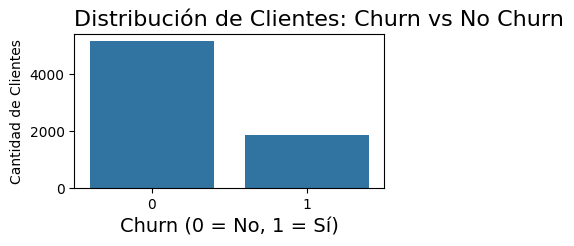

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# Conteo de valores
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=df_f, x='churn')
ax.set_title('Distribución de Clientes: Churn vs No Churn',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

### **Recuento de evasión por variables categóricas**

In [38]:
df_f.customer_gender.unique()

array(['Female', 'Male'], dtype=object)

En el siguiente Código, mi objetivo es tener en claro cuantas personas del sexo femenino conservaron el servicio y cuantas otras no, así mismo con las personas del sexo masculino, para ellos creo dos variables llamadas "Genero_Female" y "Genero_Male", en esa variable agrego en forma de lista, la palabra clave que quiero buscar dentro de la columna "Custome_gender", y creo dos dataframe, un dataframe tendrá filtrado el género "Female", y el otro el género "Male"

In [39]:
Genero_Female = ['Female']
Female = df_f.query('@Genero_Female in customer_gender')
Genero_Male = ['Male']
Male = df_f.query('@Genero_Male in customer_gender')

En el siguiente código, realizo una gráfica de barra en general, el objetivo es para tener una perspectiva de cuantos clientes hombres y mujeres tienen contratado el servicio, aplico la función sns.countplot a la columnar "customer_gender", y posteriormente se realiza el grafico separando hombres y mujeres.

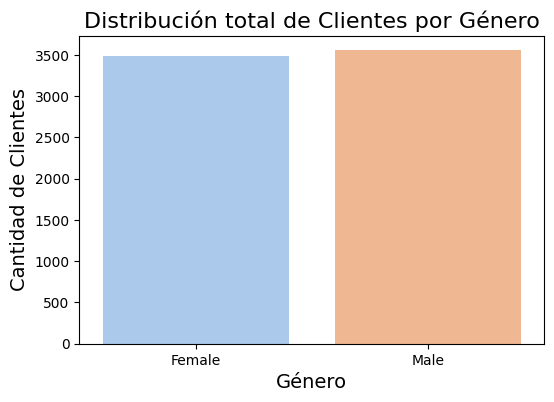

In [40]:
#Total de clientes Femeninos y Masculinos
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='customer_gender', hue='customer_gender', ax=ax, palette='pastel', legend=False)
ax.set_title('Distribución total de Clientes por Género', loc='center', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
plt.show()

En el siguiente código hago una gráfica mostrando la evasión de clientes femeninos, utilizando el dataframe filtrado "Female" creada anteriormente, utilizando la función sns.countplot, y enfocándome en la columna 'churn'

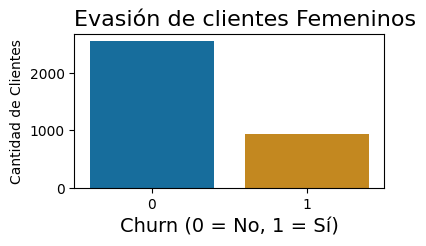

In [41]:
#Distribución de evasión de clientes femeninos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Female, x='churn', hue='churn', palette='colorblind', legend=False)
ax.set_title('Evasión de clientes Femeninos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

De igual forma en el siguiente código hago una gráfica mostrando la evasión de clientes masculinos, utilizando el dataframe filtrado "Male" creada anteriormente, utilizando la función sns.countplot, y enfocándome en la columna 'churn'

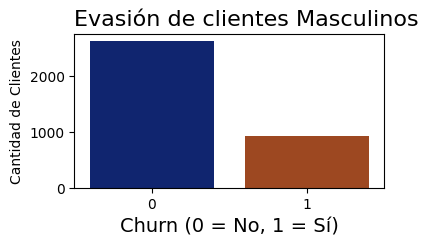

In [42]:
#Distribución de evasión de clientes masculinos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Male, x='churn',hue='churn', palette='dark', legend=False)
ax.set_title('Evasión de clientes Masculinos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

En el siguiente Código combinamos ambas informaciones, es decir, la cantidad de evasión de hombres y mujeres con respecto al servicio, mostrando una gráfica más clara del comportamiento de la evasión.
Para lograr esta grafica utilizamos sns.countplot, llamamos a nuestro dataframe df_f, en x colocamos nuestra columna 'customer_gender'y en hue llamamos nuestra columna 'churn', y el resultado es la gráfica mencionada anteriormente, lo que hace nuestra función sns.countplot es contar la cantidad de veces que estan las palabras "male" y "female", posteriormente relaciona "male" y "female" con la columna churn, es decir, pone en orden cuantas veces "male" tiene 0 con respecto a 'churn' y cuantas veces hay 1, permitiendo graficar las barras, de igual forma funciona con la palabra 'female'.


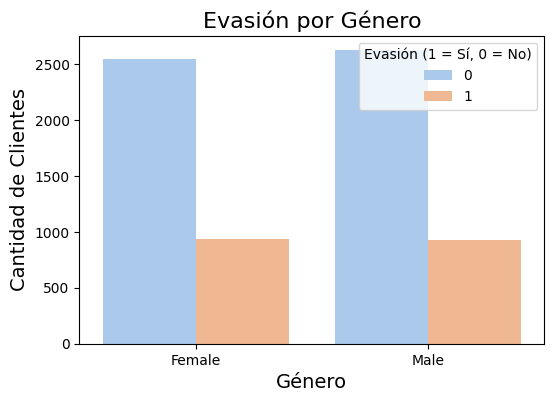

In [43]:
#Grafica general de Evasión por Genero
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='customer_gender', hue='churn', palette='pastel', ax=ax)
ax.set_title('Evasión por Género', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')
plt.show()

La siguiente grafica fue generada de la misma forma que la anterior, pero con diferencias en el Código, sobre todo en la función sns.countplot, llamamos a nuestro dataframe df_f, en x colocamos nuestra columna 'account_contract' y en hue llamamos nuestra columna 'churn', lo que hace nuestra función sns.countplot es contar la cantidad de veces que están las palabras "one year", "month-to-month" y "two year", posteriormente relaciona estas palabras con la columna churn, es decir, pone en orden cuantas veces algunas de estas palabras tiene 0 o 1 con respecto a 'churn'.

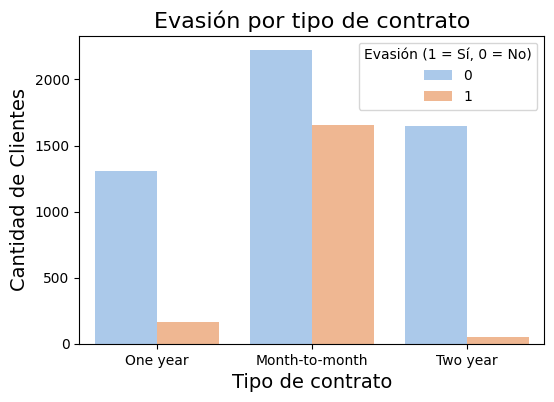

In [44]:
#Grafica de Evasión por tipo de contrato
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='account_contract', hue='churn', palette='pastel', ax=ax)
ax.set_title('Evasión por tipo de contrato', fontsize=16)
ax.set_xlabel('Tipo de contrato', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')
plt.show()

Para realizar la gráfica de evasión por método de pago, Utilizamos el mismo proceso como lo hice anteriormente con las demás graficas de barra, ahora en nuestra función mando a llamar 'account_paymentmethod', que es una columna dentro de nuestro dataframe 'df_f', esta función hará completamente lo mismo como lo hizo con las otras columnas, detectara las palabras, las ordenara por la cantidad de veces que se repita, y relacionara si tiene 0 y 1 con respecto a la columna 'churn', graficando de tal modo que pueda ser claro para cualquier persona.
Uno de los detalles en esta grafica es que, al contener más palabras, es posible que su visualización no sea del todo clara, así que agrego una línea con la función plt.xticks(rotation=30, ha='right'), con el objetivo de rotar las palabras que están en el eje x, en rotation=30, especificamos el ángulo de inclinación y en ‘ha’ la posición de estas palabras, por ultimo agrego una función con ciclo for, con el objetivo de que arriba de las barras tengan la representación numérica exacta de la evasión, en este ciclo for especificamos la posición de cada número, el ‘if height > 0’ es precisamente para que barras que tengan el número 0, no vaya a sobrescribirse el número 0, arriba de una barra inexistente (en caso de que exista algún valor en 0)

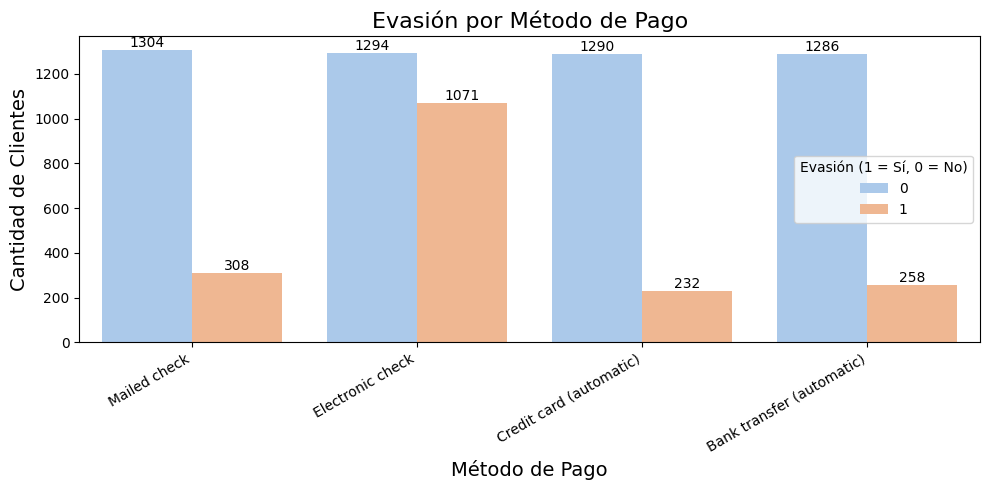

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))  # Aumentamos tamaño horizontal
sns.countplot(data=df_f, x='account_paymentmethod', hue='churn', palette='pastel', ax=ax)

# Título y etiquetas
ax.set_title('Evasión por Método de Pago', fontsize=16)
ax.set_xlabel('Método de Pago', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='Evasión (1 = Sí, 0 = No)')

# Rotar etiquetas del eje X para mejor lectura
plt.xticks(rotation=30, ha='right')

# Agregar etiquetas de valor encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Conteo de evasión por variables numéricas**

In [46]:
df_f.sample(10)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
3048,4238-HFHSN,0,Male,1,1,0,61,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,82.15,4904.85,2.698752
3484,4817-VYYWS,1,Female,0,0,0,30,1,1,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,100.20,2983.80,3.291721
3380,4693-VWVBO,0,Female,0,0,0,3,1,0,0,...,0,0,0,0,Month-to-month,0,Electronic check,19.55,61.05,0.642247
5643,7707-PYBBH,0,Male,0,0,0,40,1,0,DSL,...,0,1,0,0,Month-to-month,1,Mailed check,61.90,2647.10,2.033509
5652,7718-UPSKJ,0,Female,0,1,0,69,1,0,Fiber optic,...,0,1,1,1,One year,1,Credit card (automatic),106.40,7251.90,3.495401
6078,8309-IEYJD,0,Female,1,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.60,70.60,2.319317
2433,3398-GCPMU,0,Female,1,1,1,72,1,1,DSL,...,1,1,1,1,Two year,1,Credit card (automatic),89.55,6448.85,2.941853
464,0661-KQHNK,0,Female,0,1,1,6,1,0,0,...,0,0,0,0,One year,0,Credit card (automatic),19.00,105.50,0.624179
1384,2001-EWBQU,0,Female,0,0,0,60,1,1,Fiber optic,...,1,0,1,1,Two year,0,Electronic check,104.70,6333.80,3.439553
165,0263-FJTQO,0,Male,0,1,1,50,1,1,DSL,...,0,1,1,0,Two year,1,Credit card (automatic),70.50,3486.65,2.316032


En el siguiente Código creamos un "Boxplot" para entender la evasión con respecto a la cuenta total de los clientes, en nuestro dataframe "df_f" hay una columna llamada "account_charges_total", que representa el gasto total por cuenta, al analizar el documento observamos que cada persona tiene un gasto total diferente, en un escenario real puede que existan patrones de que varias personas tienen la misma cantidad de datos, o similares, sin embargo en este caso, nuestra columna tiene información decimal, por lo que crear un gráfico de barras sería un poco impensable, ya que no existe un patrón en la información de gasto total, pero podemos crear un boxplot para visualizar el comportamiento de la evasión con respecto a la cuenta total, en el boxplot observaremos la cuenta total máxima y mínima de los clientes, con esa información entenderemos cuanto gastan en total las personas que conservan el servicio y cuantas gastan las personas que cancelaron el servicio.
Para lograr graficas boxplot usamos la función sns.boxplot, llamamos nuestro dataframe "df_f", posteriormente nos ubicamos en nuestra columna 'churn' en x, y en el eje y la columna, 'account_charges_total'. Esta función hará algo interesante, en nuestro eje x aparecerá 0 y 1, es decir "no" y "si", en nuestro eje y aparecerá el valor máximo de la cuenta total, nuestro Código tomara los valores de la variable 'account_charges_total' y categorizará el rango numérico con respecto a 'churn' que tengan 0 o 1, un ejemplo, si en el dataframe existiera en la columna de 'account_charges_total' que algunos clientes tienen como gasto total 1000.16, 2004.00, 2004.12, 1234.00. y estos clientes en la columna churn muestran que el primero cancelo, el segundo y el tercero conservan el servicio y el cuarto cliente no, entonces nuestra función creara el boxplot, con los dos clientes que cancelaron el servicio y con los otros dos que no cancelaron, creando así el boxplot representando la cuenta total de los que cancelaron y los que no.


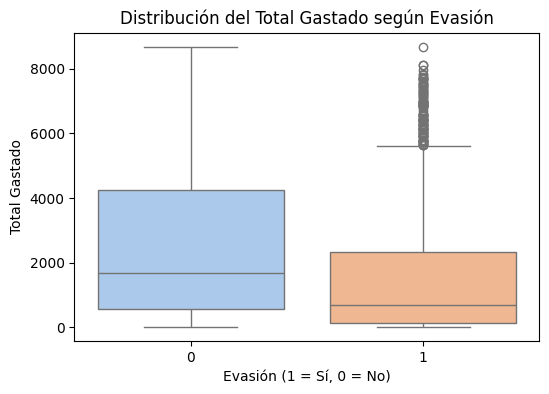

In [47]:
#Evasión con respecto a la cuenta total de los clientes
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot para Total Gastado vs Evasión
plt.figure(figsize=(6,4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='account_charges_total', palette='pastel', legend=False)
plt.title('Distribución del Total Gastado según Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Total Gastado')
plt.show()

Para crear el Boxplot de la evasión por el tiempo de contrato, sigue la misma lógica, ahora en nuestra función sns.boxplot agregamos nuestra columna 'customer_tenure' que se encuentra en nuestro dataframe 'df_f'.

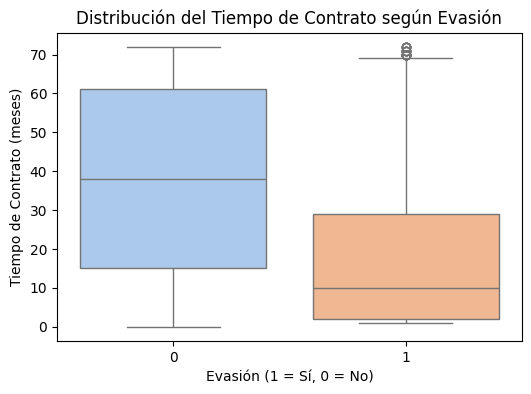

In [48]:
# Boxplot para Tiempo de Contrato vs Evasión
plt.figure(figsize=(6,4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='customer_tenure', palette='pastel', legend=False)
plt.title('Distribución del Tiempo de Contrato según Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

### **Análisis de correlación entre variables**

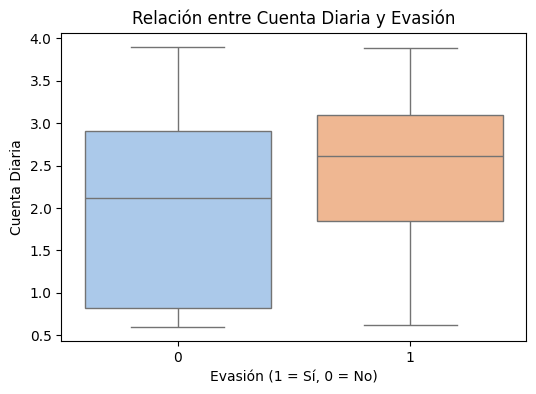

In [49]:
#Relación entre cuenta diaria y evasión
# Boxplot: cuenta diaria vs evasión
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='cuentas_diarias', palette='pastel', legend=False)
plt.title('Relación entre Cuenta Diaria y Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Cuenta Diaria')
plt.show()

Para crear un boxplot y saber la evasión con respecto a la cantidad de servicios que las personas contrataron, hago una columna de nombre 'total_servicios' dentro del dataframe 'df_f', en esta columna agrego todos los servicios que contiene el dataframe, dando como resultado la cantidad de servicios que las personas tienen contratado, esta línea sumara únicamente los valores con '1', por eso la importancia de transformar los 'Si' y 'No', en 0 y 1, así tener un mayor control y una visualización exacta de los servicios contratados. Una vez realizada esa columna, creamos el boxplot con la línea sns.boxplot, en nuestro eje x agregamos nuestra columna 'churn' y en nuestro eje 'y' nuestra nueva columna llamada 'total_servicios', dando como resultado el boxplot con una visualización más clara de cuantos servicios tienen o tenían contratado las personas que conservan el servicio y las que no.

In [50]:
#Relación entre número de servicios contratados y evasión
df_f['total_servicios'] = df_f[['phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup',
                          'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies']].sum(axis=1)

In [51]:
print(df_f[['total_servicios', 'churn']].corr())

                 total_servicios     churn
total_servicios         1.000000 -0.067264
churn                  -0.067264  1.000000


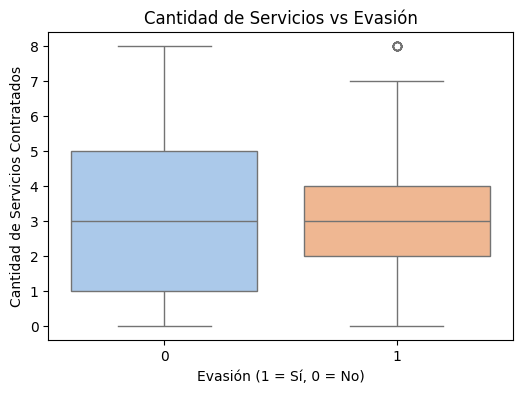

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_f, x='churn', hue='churn', y='total_servicios', palette='pastel', legend=False)
plt.title('Cantidad de Servicios vs Evasión')
plt.xlabel('Evasión (1 = Sí, 0 = No)')
plt.ylabel('Cantidad de Servicios Contratados')
plt.show()

### **CONCLUSIONES**

Tras realizar un análisis detallado del DataFrame, incluyendo filtrado y estandarización de datos, se identificaron patrones significativos en el comportamiento de los clientes que cancelan el servicio frente a aquellos que lo conservan.

En primer lugar, se observa que la proporción de clientes femeninos y masculinos es similar, y ambos grupos presentan tasas comparables tanto de cancelación como de retención. Sin embargo, destaca que el método de pago "electronic check" está fuertemente asociado a una mayor tasa de cancelación.

El análisis del boxplot que relaciona la evasión con el gasto total muestra que los clientes que cancelan tienden a tener un gasto acumulado menor que aquellos que permanecen. Además, es común que quienes cancelan el servicio tengan una antigüedad menor a 30 meses. Por otro lado, el boxplot de evasión frente al gasto diario revela un dato interesante: los clientes que se dan de baja, en promedio, realizan un gasto diario más alto que los que continúan con el servicio.

Otro hallazgo relevante es que los clientes que conservan el servicio suelen tener contratados más servicios adicionales en comparación con quienes cancelan.

Con base en estos hallazgos, se puede concluir que los factores asociados a la cancelación del servicio incluyen un mayor gasto diario, menor tiempo de permanencia, un número reducido de servicios contratados y el uso del método de pago electronic check.

Para abordar este problema, se recomienda implementar estrategias que reduzcan la percepción de alto costo diario, como promociones o beneficios por contratar más servicios. También es importante fomentar el uso de métodos de pago más prácticos, informando con claridad sobre las opciones disponibles y facilitando su adopción.

Finalmente, se detectó que un número significativo de clientes que pagan con electronic check no tienen contratados servicios clave como internet_deviceprotection (1,557 personas) e internet_onlinebackup (1,550 personas). Por ello, se sugiere desarrollar campañas enfocadas en ofrecer estos servicios como parte esencial de la seguridad y respaldo digital. Estos paquetes podrían presentarse de forma más atractiva para recuperar clientes que han cancelado el servicio, de igual forma crear promociones para que las personas contraten el servicio a largo plazo, ya que las personas que contratan el servicio y pagan mes con mes suelen cancelar el servicio que las personas que contratan por uno o dos años.
